<div style='background-image: url("../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Handling Time</div>
        </div>
    </div>
</div>

Seismo-Live: http://seismo-live.org

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))
* Tobias Megies ([@megies](https://github.com/megies))

---

![](images/obspy_logo_full_524x179px.png)

This is a bit dry but not very difficult and important to know. It is used everywhere in ObsPy!


* All absolute time values are consistently handled with this class
* Based on a double precision POSIX timestamp for accuracy
* Timezone can be specified at initialization (if necessary)
* In Coordinated Universal Time (UTC) so no need to deal with timezones, daylight savings, ...

---

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

---

## Features of **`UTCDateTime`**

#### Initialization

In [2]:
from obspy import UTCDateTime

print(UTCDateTime("2011-03-11T05:46:23.2"))        # mostly time strings defined by ISO standard
print(UTCDateTime("2011-03-11T14:46:23.2+09:00"))  # non-UTC timezone input
print(UTCDateTime(2011, 3, 11, 5, 46, 23, 2))
print(UTCDateTime(1299822383.2))

2011-03-11T05:46:23.200000Z
2011-03-11T05:46:23.200000Z
2011-03-11T05:46:23.000002Z
2011-03-11T05:46:23.200000Z


In [3]:
# Current time can be initialized by leaving out any arguments
print(UTCDateTime())

2016-04-11T19:16:29.233010Z


#### Attribute Access

In [4]:
time = UTCDateTime("2011-03-11T05:46:23.200000Z")
print(time.year)
print(time.julday)
print(time.timestamp)
print(time.weekday)
# try time.<Tab>

2011
70
1299822383.2
4


#### Handling time differences

* "**`+`**/**`-`**" defined to add seconds to an **`UTCDateTime`** object
* "**`-`**" defined to get time difference of two **`UTCDateTime`** objects

In [5]:
time = UTCDateTime("2011-03-11T05:46:23.200000Z")
print(time)

2011-03-11T05:46:23.200000Z


In [6]:
# one hour later
print(time + 3600)

2011-03-11T06:46:23.200000Z


In [7]:
time2 = UTCDateTime(2012, 1, 1)
print(time2 - time)

25553616.8


### Exercises

Calculate the number of days passed since the Tohoku main shock (the timestamp used above).

In [8]:
print((UTCDateTime() - UTCDateTime("2011-03-11T05:46:23.200000Z")) / 86400)

1858.5625700825462


Make a list of 10 UTCDateTime objects, starting today at 10:00 with a spacing of 90 minutes.

In [9]:
t = UTCDateTime(2014, 2, 24, 10)

times = []
for i in range(10):
    t2 = t + i * 90 * 60
    times.append(t2)

times

[2014-02-24T10:00:00.000000Z,
 2014-02-24T11:30:00.000000Z,
 2014-02-24T13:00:00.000000Z,
 2014-02-24T14:30:00.000000Z,
 2014-02-24T16:00:00.000000Z,
 2014-02-24T17:30:00.000000Z,
 2014-02-24T19:00:00.000000Z,
 2014-02-24T20:30:00.000000Z,
 2014-02-24T22:00:00.000000Z,
 2014-02-24T23:30:00.000000Z]

Below is a list of strings with origin times of magnitude 8+ earthquakes since 2000 (fetched from IRIS). Assemble a list of interevent times in days. Use matplotlib to display a histogram.

In [10]:
times = ["2001-06-23T20:33:09",
         "2003-09-25T19:50:07",
         "2004-12-23T14:59:00",
         "2004-12-26T00:58:52",
         "2005-03-28T16:09:35",
         "2006-06-01T18:57:02",
         "2006-06-05T00:50:31",
         "2006-11-15T11:14:14",
         "2007-01-13T04:23:23",
         "2007-04-01T20:39:56",
         "2007-08-15T23:40:58",
         "2007-09-12T11:10:26",
         "2009-09-29T17:48:11",
         "2010-02-27T06:34:13",
         "2011-03-11T05:46:23",
         "2012-04-11T08:38:36",
         "2012-04-11T10:43:10",
         "2013-05-24T05:44:48"]

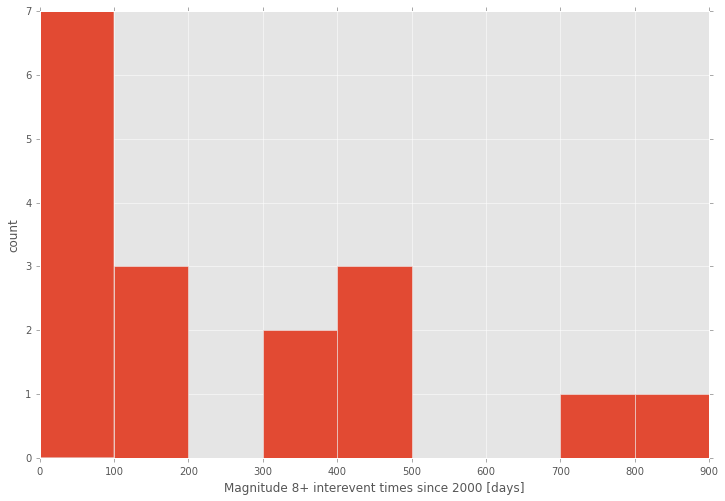

In [11]:
import matplotlib.pyplot as plt

inter_event_times = []

for i in range(1, len(times)):
    dt = UTCDateTime(times[i]) - UTCDateTime(times[i-1])
    dt = dt / (3600 * 24)
    inter_event_times.append(dt)

plt.hist(inter_event_times, bins=range(0, 1000, 100))
plt.xlabel("Magnitude 8+ interevent times since 2000 [days]")
plt.ylabel("count")
plt.show()